<a href="https://colab.research.google.com/github/annagradziel12/statystyka/blob/master/02_wizualizacja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wizualizacja danych

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

*Wykres* będzie dla nas reprezentacją *danych*. Wykres składa się z *elementów*, takich jak słupki, koła, ikony. 

Dane składają się ze *zmiennych* (cena, waga, temperatura, prędkość) które opisane są w *skalach*. 

Wizualizacja danych polega na *przedstawieniu/zakodowaniu* danych za pomocą *cech* elementów wykresów.'



# Skale pomiarowe

* **skala ilorazowa** (ang.*ratio scale*) - skala, w której istnieje fizyczny sens zarówno dla różnic i ilorazów, np. cena produktu (kilogram jabłek może być o 2 zł tańszy od kilograma gruszek, kilogram ogórków jest dwa razy tańszy od kilograma pomidorów);

* **skala przedziałowa** (ang. *interval scale*) - skala, w której istnieje fizyczny sens różnic wartości, ale nie ich ilorazów, np. daty, temperatura (I Wojna Światową rozpoczęła się 25 lat przed II Wojną Światową);

* **skala porządkowa** (ang. *ordinal scale*) - skala, dla której istnieje fizyczny sens dla kolejności wartości, ale nie dla ich różnic czy ilorazów, np. wykształcenie;

* **skala nominalna** (ang. *nominal scale*) - skala, w której wartości można zapisać za pomocą liczb, ale nie ma fizycznej interpretacji dla kolejności tych wartości, różnic czy ilorazów, np. numer PESEL;

# Typy wykresów

### Wykres punktowy (ang. *scatter plot*)
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
?sns.scatterplot

Object `sns.scatterplot` not found.


In [ ]:
?plt.plot

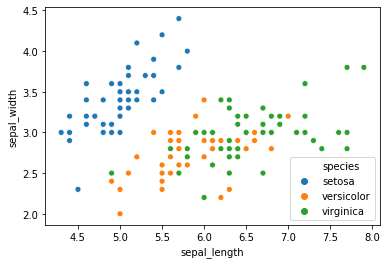

In [ ]:
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df)
plt.show()

### Wykres słupkowy (ang. *bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
?sns.barplot

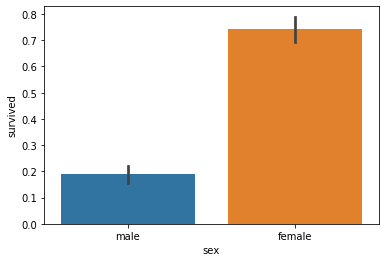

In [ ]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

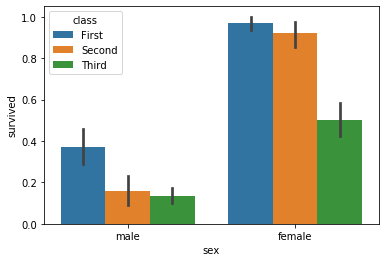

In [ ]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)
plt.show()

### Skumulowany wykres słupkowy (ang. *stacked bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [ ]:
?sns.barplot

In [ ]:
grouped_titanic = titanic.groupby(['class', 'sex'])['survived'].agg('sum')
grouped_titanic

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.
/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """
/opt/anaco

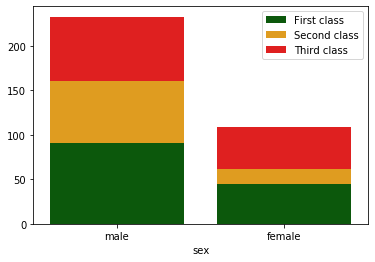

In [ ]:
sns.barplot(x="sex", y=grouped_titanic["First"].get_values(), data=titanic, label="First class", 
           color = "darkgreen")
sns.barplot(x="sex", y=grouped_titanic['Second'].get_values(), data=titanic, label="Second class",
           color="orange", bottom=grouped_titanic["First"].get_values())
sns.barplot(x="sex", y=grouped_titanic['Third'].get_values(), data=titanic, label="Third class",
           color="red", bottom=grouped_titanic["First"].get_values() + grouped_titanic['Second'].get_values())
plt.legend()
plt.show()

### Histogram (ang. *histogram*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [ ]:
?sns.distplot

In [ ]:
df = sns.load_dataset('iris')

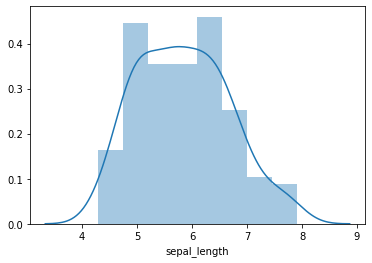

In [ ]:
sns.distplot(df['sepal_length'], kde=True)

### Estymator jądrowy gęstości (ang. *kernel density plot*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna

In [ ]:
?sns.kdeplot

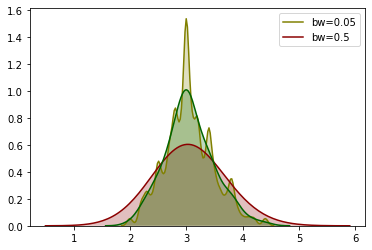

In [ ]:
df = sns.load_dataset('iris')

# parametr wygladzania 
sns.kdeplot(df['sepal_width'], shade=True, bw=.05, color="olive")
sns.kdeplot(df['sepal_width'], shade=True, bw=.5, color="darkred")
sns.kdeplot(df['sepal_width'], shade=True, color="darkgreen")

plt.legend(["bw=0.05", "bw=0.5"])
plt.show()

### Pair plot 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [ ]:
?sns.pairplot

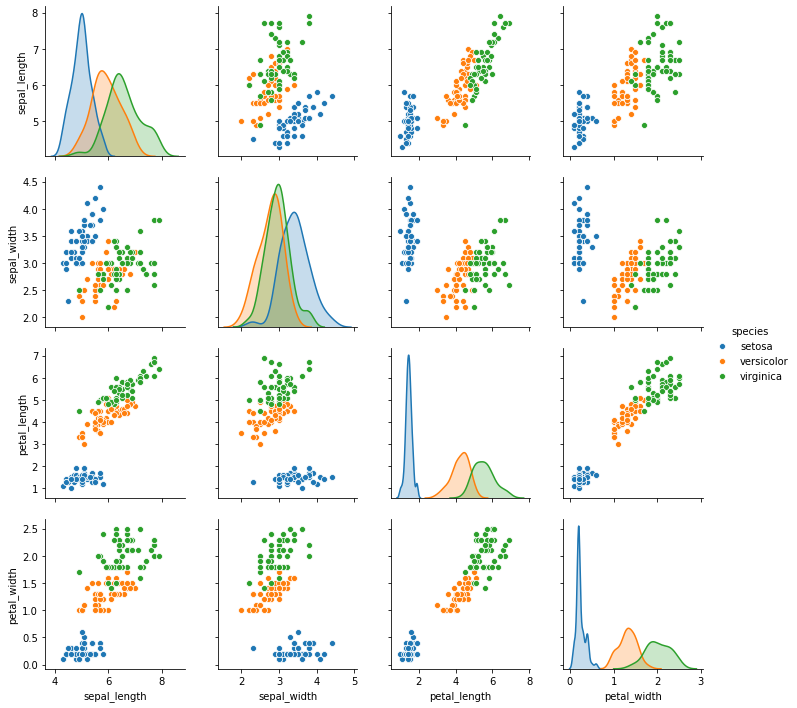

In [ ]:
df = sns.load_dataset('iris')

sns.pairplot(df, kind="scatter", hue="species")
plt.show()

### Wykres pudełkowy (ang. *boxplot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [ ]:
?sns.boxplot

In [ ]:
df = sns.load_dataset('iris')


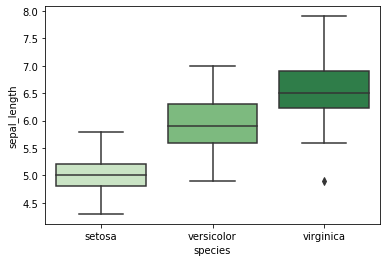

In [ ]:
sns.boxplot(x="species", y="sepal_length", data=df, palette="Greens")

### Wykres skrzypcowy (ang. *violin plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [ ]:
?sns.violinplot

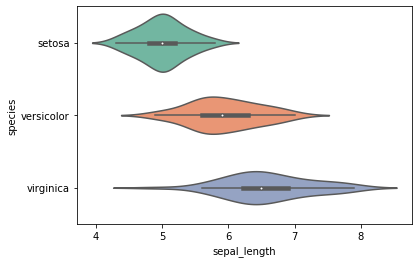

In [ ]:
df = sns.load_dataset('iris')

sns.violinplot(y="species", x="sepal_length", data=df, palette="Set2")

### Mapa termiczna (ang. *heat map*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna kategoryczna, $Z$ - zmienna numeryczna.

In [ ]:
?sns.heatmap

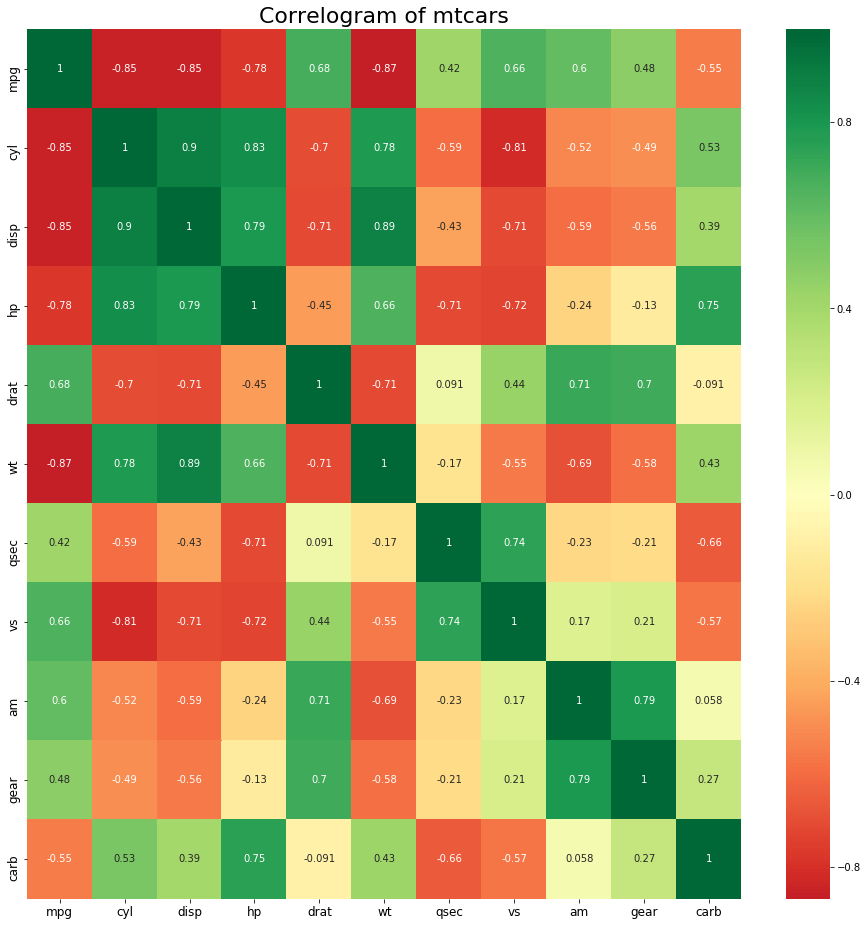

In [ ]:
df = pd.read_csv("../data/mtcars.csv")

plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.corr(), cmap="RdYlGn", center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Zadanie - ceny mieszkań 
Wczytaj dane `ceny_mieszkan_polska.csv` opisujące średnie kwartalne ceny mieszkań za metr kwadratowy w największych miastach w Polsce. 

a) Przedstaw na wykresie zależność ceny od czasu dla cen mieszkań za metr kwadratowy w trzech wybranych miastach w Polsce.

b) Przedstaw na wykresie rozkład ceny w zależności od miasta.

In [ ]:
ceny_mieszkan = pd.read_csv('../data/ceny_mieszkan_polska.csv') # rynek pierwotny
ceny_mieszkan.head(5)

Kwartał  Białystok  Bydgoszcz  Gdańsk  Gdynia  Katowice  Kielce  Kraków  \
0  III 2006       2727       3243    5004    4937      3986    2919    6021   
1   IV 2006       2727       3947    6199    5284      4062    3493    7929   
2    I 2007       4181       4501    6437    6466      4518    3382    8247   
3   II 2007       4725       5700    7999    8934      5181    3902    8129   
4  III 2007       4199       4994    8053    8114      6236    4651    8420   

   Lublin  Łódź  Olsztyn   Opole  Poznań  Rzeszów  Szczecin  Warszawa  \
0    3456  3210     4000  3343.0    4770     2862      3215      5873   
1    3314  4237     4800     NaN    4827     3401      3679      6095   
2    3604  4927     5149     NaN    7275     3420      4749      7509   
3    4143  5453     4776     NaN    7360     4080      5050      8000   
4    4645  5201     4900  4784.0    6838     4069      5035      8740   

   Wrocław  Zielona Góra  7 miast  
0     4750          2754     5427  
1     5759          2869     6143  
2     6309          2872     6941  
3     6294          4153     8097  
4     6444          4208     8212

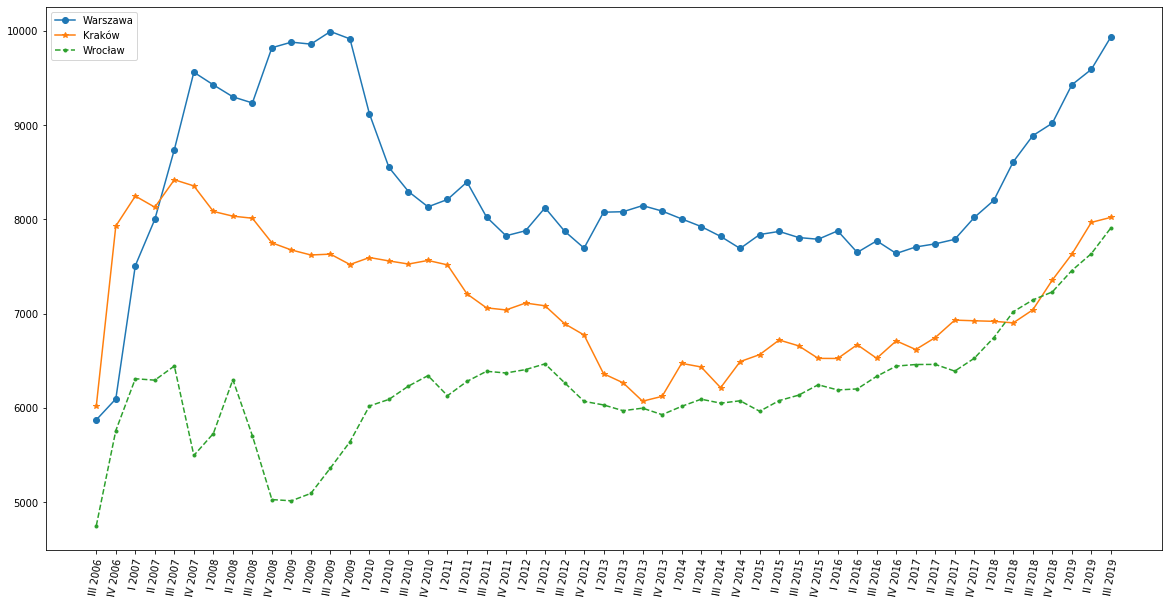

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Warszawa, 'o-', label="Warszawa")
plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Kraków, '*-', label="Kraków")
plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Wrocław, '.--', label="Wrocław")


plt.xticks(rotation=80)
plt.legend()
plt.show()

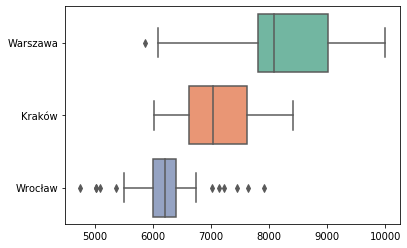

In [ ]:
sns.boxplot(data=ceny_mieszkan[['Warszawa', 'Kraków', 'Wrocław']], orient='h', palette='Set2')

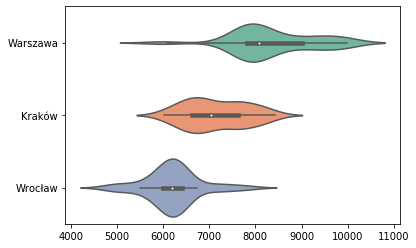

In [ ]:
sns.violinplot(data=ceny_mieszkan[['Warszawa', 'Kraków', 'Wrocław']], orient='h', palette='Set2')

## Zadanie - COVID-19
Wczytaj dane `covid19.csv` zawierające dane na temat liczby dziennych zakażeń oraz liczby zgonów spowodowanych koronawirusem.

a) Przedstaw na wykresie zależność liczby nowych zakażeń koronawirusem od czasu dla kilku wybranych krajów.

b) Przedstaw ranking krajów z największa liczbą stwierdzonych przypadków zakażeń koronawirusem oraz liczbą zgonów spowodowanych koronawirusem.

*Źródło*: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

In [ ]:
covid19 = pd.read_csv('../data/covid19.csv')
covid19.head()

Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
3  2020-01-22      Andorra          0          0       0
4  2020-01-22       Angola          0          0       0

In [ ]:
aggr_confirmed = pd.DataFrame(covid19.groupby('Country')['Confirmed'].max())\
    .sort_values('Confirmed', ascending=False)
aggr_deaths = pd.DataFrame(covid19.groupby('Country')['Deaths'].max())\
    .sort_values('Deaths', ascending=False)

In [ ]:
top_confirmed = aggr_confirmed.head(5)
top_confirmed = top_confirmed.append(aggr_confirmed[aggr_confirmed.index == 'Poland'])
top_confirmed

Confirmed
Country           
US          555313
Spain       166831
Italy       156363
France      133670
Germany     127854
Poland        6674

In [ ]:
ts_confirmed = covid19[[c in top_confirmed.index.values for c in covid19.Country]]
ts_confirmed.head()

Date  Country  Confirmed  Recovered  Deaths
61   2020-01-22   France          0          0       0
65   2020-01-22  Germany          0          0       0
84   2020-01-22    Italy          0          0       0
134  2020-01-22   Poland          0          0       0
156  2020-01-22    Spain          0          0       0

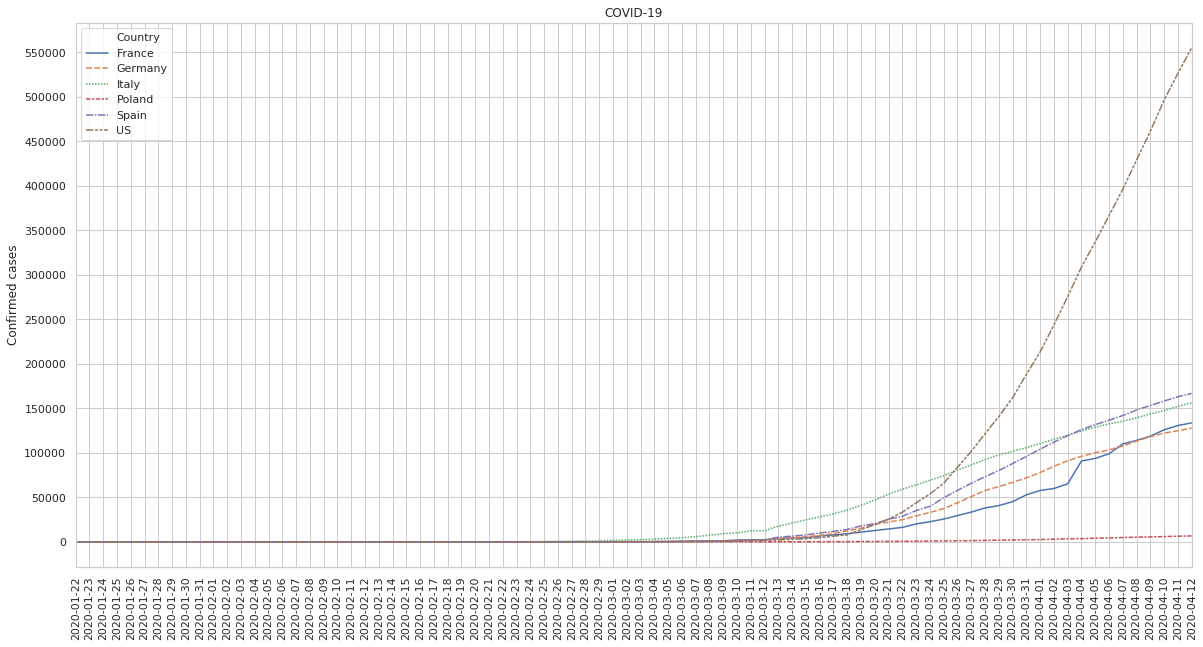

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.lineplot(x="Date", y="Confirmed", hue="Country", style="Country", palette="deep", data=ts_confirmed)
plt.xlim(ts_confirmed.Date.min(), ts_confirmed.Date.max())
plt.title("COVID-19")
plt.xlabel("")
plt.ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0, 600000, 50000))
plt.show()

In [ ]:
top_confirmed = aggr_confirmed.head(15)
top_confirmed = top_confirmed.append(aggr_confirmed[aggr_confirmed.index == 'Poland'])

top_deaths = aggr_deaths.head(15)
top_deaths = top_deaths.append(aggr_deaths[aggr_deaths.index == 'Poland'])

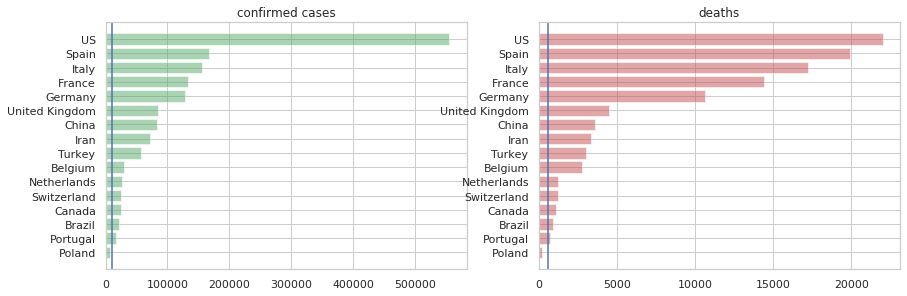

In [ ]:
plt.figure(figsize=(22, 10))

plt.subplot(231)
plt.barh(top_confirmed.index, top_confirmed.Confirmed, color="g", alpha=0.5)
plt.title("confirmed cases")
plt.gca().invert_yaxis()
plt.axvline(float(aggr_confirmed.mean()))

plt.subplot(232)
plt.barh(top_confirmed.index, top_deaths.Deaths, color="r", alpha=0.5)
plt.title("deaths")
plt.gca().invert_yaxis()
plt.axvline(float(aggr_deaths.mean()))
plt.show()

## Zadanie - Absolwenci  
Wczytaj dane `absolwenci_kierunek_20182019.csv` opisujące liczbe absolwentów wybranych kierunków w roku akademickim 2018/2019.

Przedstaw na wykresie:

a) proporcje absolwentów względem kierunku;

b) proporcje absolwentów względem kierunku i płci.

*Źródło danych*: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/szkolnictwo-wyzsze-w-roku-akademickim-20182019-wyniki-wstepne,8,6.html

In [ ]:
absolwenci = pd.read_csv('../data/absolwenci_kierunek_20182019.csv')
absolwenci

Kierunek  Ogolem  Kobiety
0                                    Kształcenie   29071    24478
1                   Nauki humanistyczne i sztuka   28250    20991
2   Nauki społeczne, dziennikarstwo i informacja   35260    25006
3                  Biznes, administracja i prawo   73694    50374
4    Nauki przyrodnicze, matematyka i statystyka   13406     9625
5                   Technologie teleinformacyjne   13520     2179
6                Technika, przemysł, budownictwo   64639    27585
7                                      Rolnictwo    6498     3748
8                     Zdrowie i opieka społeczna   34513    27440
9                                         Usługi   27702    15591
10           Indywidualne studia międzyobszarowe    1161      898

In [ ]:
?plt.pie

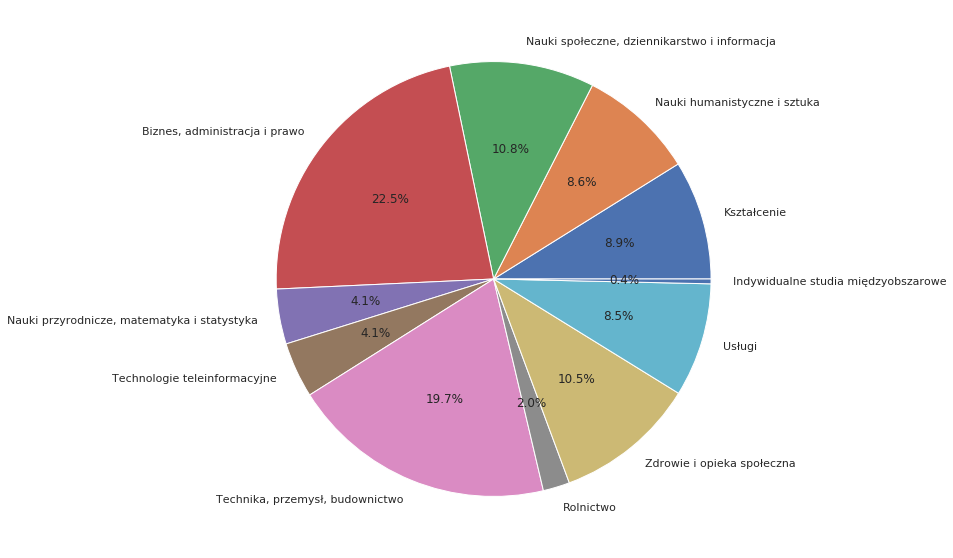

In [ ]:
plt.figure(figsize=(20, 10))
plt.pie(absolwenci.Ogolem, labels=absolwenci.Kierunek, autopct="%1.1f%%")
plt.show()

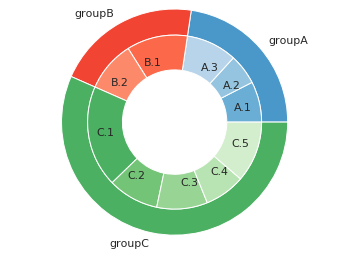

In [ ]:
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [ ]:
absolwenci['Grupa'] = absolwenci.Kierunek
absolwenci['Grupa'][absolwenci.Ogolem / np.sum(absolwenci.Ogolem) < 0.1] = 'Inne'
absolwenci

/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Kierunek  Ogolem  Kobiety  \
0                                    Kształcenie   29071    24478   
1                   Nauki humanistyczne i sztuka   28250    20991   
2   Nauki społeczne, dziennikarstwo i informacja   35260    25006   
3                  Biznes, administracja i prawo   73694    50374   
4    Nauki przyrodnicze, matematyka i statystyka   13406     9625   
5                   Technologie teleinformacyjne   13520     2179   
6                Technika, przemysł, budownictwo   64639    27585   
7                                      Rolnictwo    6498     3748   
8                     Zdrowie i opieka społeczna   34513    27440   
9                                         Usługi   27702    15591   
10           Indywidualne studia międzyobszarowe    1161      898   

                                           Grupa  
0                                           Inne  
1                                           Inne  
2   Nauki społeczne, dziennikarstwo i informacja  
3                  Biznes, administracja i prawo  
4                                           Inne  
5                                           Inne  
6                Technika, przemysł, budownictwo  
7                                           Inne  
8                     Zdrowie i opieka społeczna  
9                                           Inne  
10                                          Inne

b) proporcje absolwentów względem kierunku i płci.

## Case study

Wczytaj dane `salaryData.csv` przedstawiające wysokość zarobków w największych firmach IT. Dokonaj analizy poniższego zbioru danych, m.in.

- sprawdź ogólny rozkład zarobków,
- sprawdź, w której firmie zarabia się najwięcej,
- sprawdź, na jakim stanowisku zarabia się najwięcej,
- sprawdź, w której lokalizacji zarabia się najwięcej,
- porównaj rozkład zarobków dla dwóch/trzech wybranych firm,
- porównaj rozkład dla dwóch/trzech stanowisk (np. Data Scientist vs. Software Engineer),
- porównaj rozkład dla kilku lokalizacji,
- porównaj rozkład dla dwóch/trzech stanowisk dla wybranej lokalizacji.

In [ ]:
# https://www.levels.fyi/
# data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
# df = pd.DataFrame(data)

df = pd.read_csv('../data/salaryData.csv')
df.head(5)

timestamp    company   level                         title  \
0   6/7/2017 11:33:27     Oracle      L3               Product Manager   
1  6/10/2017 17:11:29       eBay    SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon      L7               Product Manager   
3   6/13/2017 5:35:36       Uber  Senior             Software Engineer   
4  6/14/2017 21:22:25  Microsoft      64  Software Engineering Manager   

   totalyearlycompensation           location  yearsofexperience  \
0                    127.0   Redwood City, CA                1.5   
1                    100.0  San Francisco, CA                5.0   
2                    310.0        Seattle, WA                8.0   
3                    578.0  San Francisco, CA               10.0   
4                    200.0        Redmond, WA                9.0   

   yearsatcompany  tag  basesalary  stockgrantvalue    bonus gender  \
0             1.5  NaN       107.0             20.0     10.0    NaN   
1             3.0  NaN         NaN              NaN      NaN    NaN   
2             0.0  NaN       155.0              NaN      NaN    NaN   
3             2.0  NaN    180000.0        1550000.0   9000.0    NaN   
4             9.0  NaN    169000.0         100000.0  30000.0    NaN   

                       otherdetails   cityid  dmaid  rowNumber  
0                               NaN   7392.0  807.0          1  
1                               NaN   7419.0  807.0          2  
2                               NaN  11527.0  819.0          3  
3  Stock based on $48.65 per share.   7419.0  807.0          4  
4                               NaN  11521.0  819.0          5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16683 entries, 0 to 16682
Data columns (total 17 columns):
timestamp                  16683 non-null object
company                    16683 non-null object
level                      16678 non-null object
title                      16683 non-null object
totalyearlycompensation    16683 non-null float64
location                   16682 non-null object
yearsofexperience          16683 non-null float64
yearsatcompany             16683 non-null float64
tag                        15867 non-null object
basesalary                 14201 non-null float64
stockgrantvalue            12179 non-null float64
bonus                      12441 non-null float64
gender                     11629 non-null object
otherdetails               2032 non-null object
cityid                     15867 non-null float64
dmaid                      15862 non-null float64
rowNumber                  16683 non-null int64
dtypes: float64(8), int64(1), object(8)
memory usage

In [ ]:
df.shape

(16683, 17)

## Dobry czy zły wykres?

- https://ceny.szybko.pl/Warszawa-ceny-mieszkan.html

## Inne ciekawe biblioteki
- https://plot.ly/python/
- https://docs.bokeh.org/en/latest/index.html
- http://www.pygal.org/en/latest/index.html
- http://ggplot.yhathq.com/

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()